In [1]:
import os

#  > Define Parameters of Simulation

In [2]:
# Set Working Directory
os.chdir(r'C:\Users\g.varvounis\Documents\RiskQuantification')

# Set number of simulated scenarios 
number_of_scenarios = 10000
# Set number of steps (horizon) of the simulation
number_of_steps = 1

# Set directory of risk register lite file
directory_of_risk_register_lite = r'C:\Users\g.varvounis\Documents\RiskQuantification\runner\inputs'
filename_of_risk_register_lite = r'risk register lite.xlsx'
sheetname_of_risk_register_lite = r'RR Lite'

# Set directory of code's outputs
desired_directory_for_code_outputs = r'C:\Users\g.varvounis\Documents\RiskQuantification\runner\outputs'

# Set additional parameters of code
save_intermediate_files_produced_during_run = True
#replication_id = 110
replication_id = 50
materialization_of_risks_based_on_bernoulli_distro = True


# Cap of Impact
use_cap=True
cap_val = 400000000

#  > Define Parameters of Reporting

In [3]:
# Histogramm parameters
bins_number=200

# Import Modules & Dependencies

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

from scipy import stats as st
from tools.reporting import *
from main import perform_risk_register_quantification

# Perform Simulation of Risk Factors' Impact

In [5]:
df_results, dictionary_per_rf, df_horizon_summary, df_metrics = perform_risk_register_quantification(
        number_of_scenarios=number_of_scenarios, number_of_steps=number_of_steps,
        risk_register_lite_path=directory_of_risk_register_lite, risk_register_lite_filename=filename_of_risk_register_lite,
        risk_register_sheet_name=sheetname_of_risk_register_lite, output_path_folder=desired_directory_for_code_outputs,
        save_interim_outputs=save_intermediate_files_produced_during_run, seed_to_replicate_samples=replication_id,
        bernoulli_materialization_of_risks=materialization_of_risks_based_on_bernoulli_distro, apply_cap=use_cap, selected_cap=cap_val)

INFO - Simulating impact of risk factor 2066...
INFO - Simulation of impact for risk factor 2066 completed successfully!
INFO - Simulating impact of risk factor 2023...
INFO - Simulation of impact for risk factor 2023 completed successfully!
INFO - Simulating impact of risk factor 2201...
INFO - Simulation of impact for risk factor 2201 completed successfully!
INFO - Simulating impact of risk factor 2004...
INFO - Simulation of impact for risk factor 2004 completed successfully!
INFO - Simulating impact of risk factor 2067...
INFO - Simulation of impact for risk factor 2067 completed successfully!
INFO - Simulating impact of risk factor 2020...
INFO - Simulation of impact for risk factor 2020 completed successfully!
INFO - Simulating impact of risk factor 2012...
INFO - Simulation of impact for risk factor 2012 completed successfully!
INFO - Simulating impact of risk factor 2084...
INFO - Simulation of impact for risk factor 2084 completed successfully!
INFO - Simulating impact of risk

In [6]:
#df_results

In [7]:
#dictionary_per_rf["2002"]

In [8]:
#dictionary_per_rf["2001"]

# Reporting

## Final Reporting

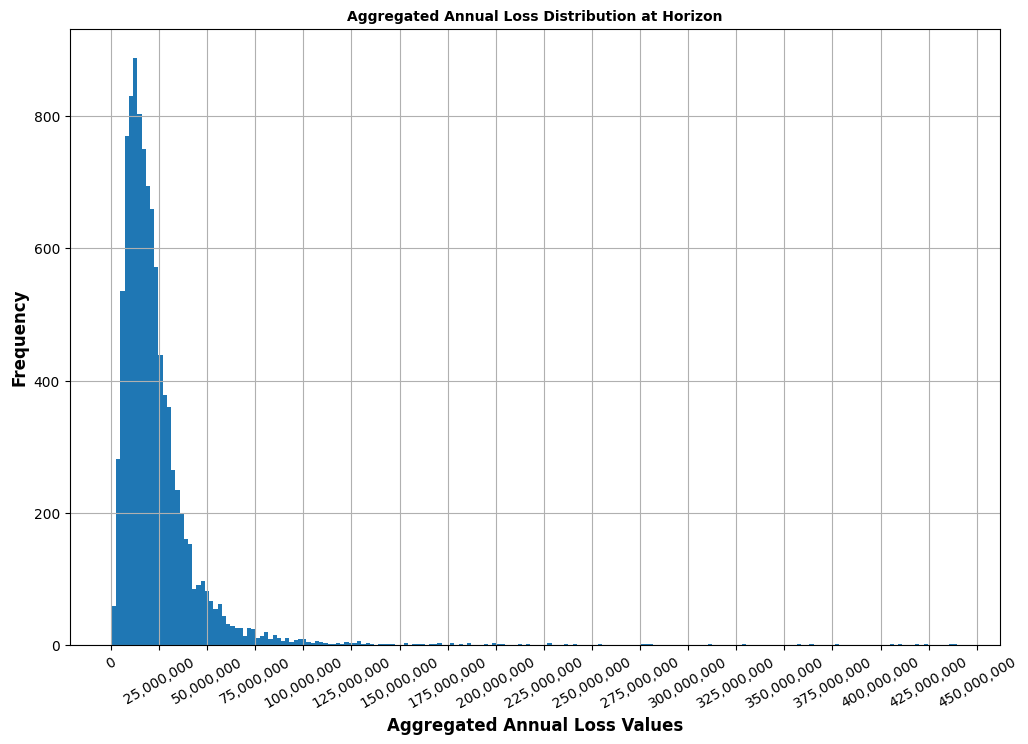

In [9]:
plot_final_impact_distribution(df_impact_results=df_results, used_bins=bins_number)

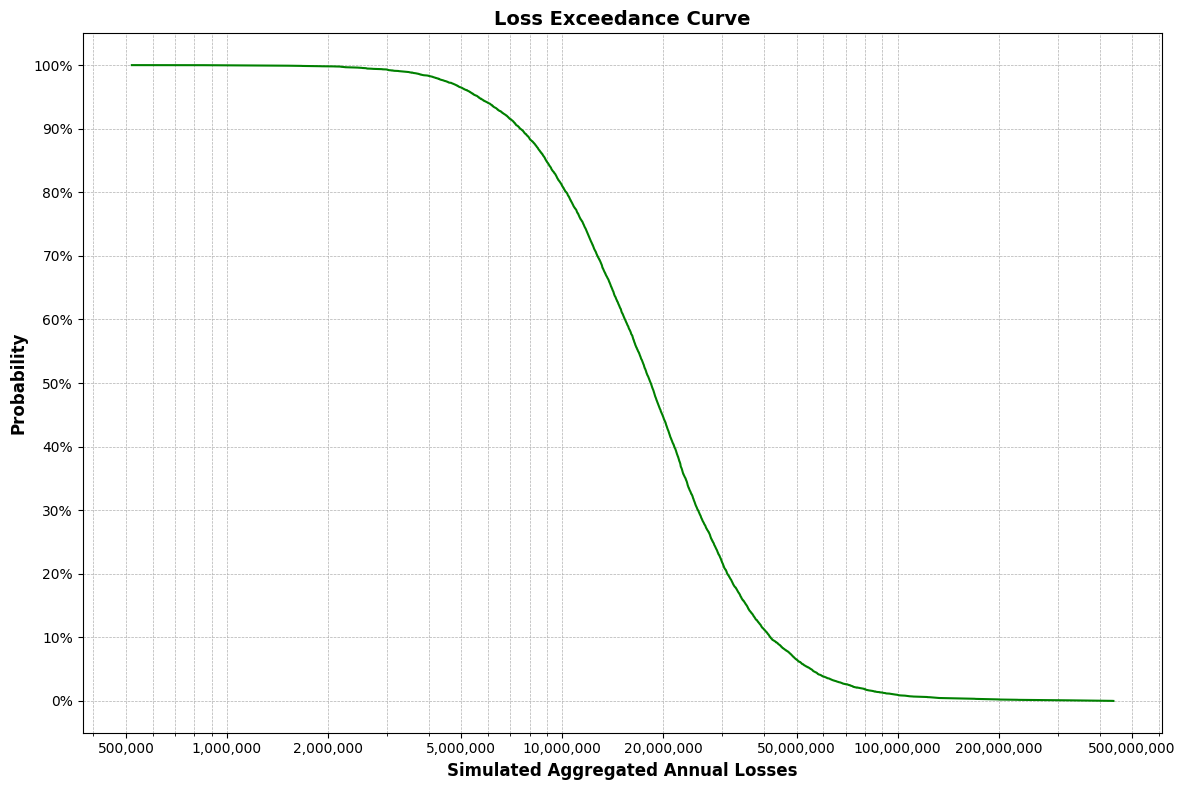

In [10]:
plot_loss_curve(df_results)

In [11]:
# Set global float format to show commas and no scientific notation
pd.options.display.float_format = '{:,.0f}'.format

df_metrics.index = ['Horizon']
df_metrics.iloc[:,1:]

,95%-Percentile Impact,99%-Percentile Impact,99.999%-Percentile Impact,90% ES,95% ES,99% ES,Expected Impact,Median Impact,Mode Impact
Horizon,"55,212,940","98,487,744","439,631,574","68,690,455","89,621,522","170,706,255","23,263,382","18,363,737","520,536"


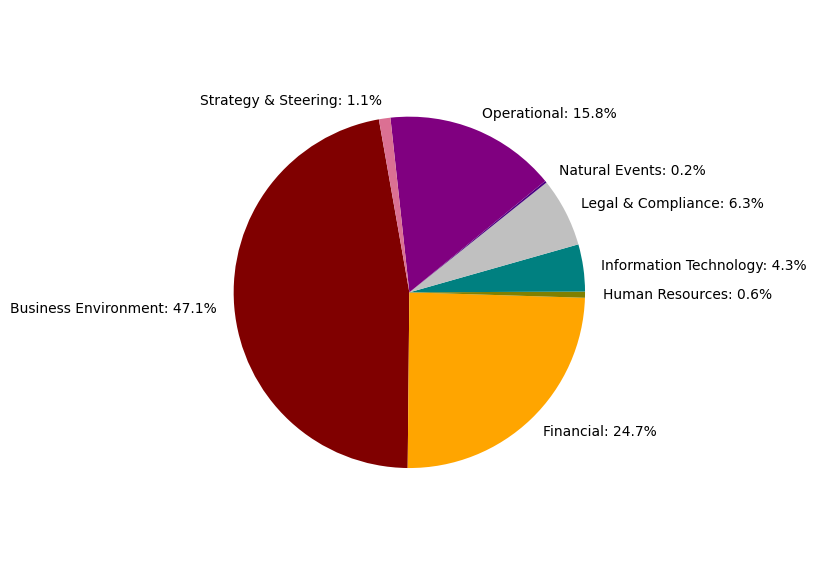

                 Taxonomy  Average Impact  Pct of Total Impact
0    Business Environment      10,950,456                   47
1               Financial       5,736,217                   25
2         Human Resources         130,995                    1
3  Information Technology       1,008,643                    4
4      Legal & Compliance       1,474,771                    6
5          Natural Events          43,413                    0
6             Operational       3,672,972                   16
7     Strategy & Steering         245,914                    1


In [12]:
plot_risk_taxonomy_dropdown(df_horizon_summary)

## Augmented Report - Statistics per Risk Taxonomy Category

In [13]:
df_business_env = df_horizon_summary[df_horizon_summary.Taxonomy == 'Business Environment'].copy()
df_financial = df_horizon_summary[df_horizon_summary.Taxonomy == 'Financial'].copy()
df_operational = df_horizon_summary[df_horizon_summary.Taxonomy == 'Operational'].copy()
df_natural_events = df_horizon_summary[df_horizon_summary.Taxonomy == 'Natural Events'].copy()
df_it = df_horizon_summary[df_horizon_summary.Taxonomy == 'Information Technology'].copy()
df_hr = df_horizon_summary[df_horizon_summary.Taxonomy == 'Human Resources'].copy()
df_legal = df_horizon_summary[df_horizon_summary.Taxonomy == 'Legal & Compliance'].copy()
df_strat = df_horizon_summary[df_horizon_summary.Taxonomy == 'Strategy & Steering'].copy()

In [14]:
dist_business_env = df_business_env.iloc[:, :-2].sum(axis=0)
dist_financial = df_financial.iloc[:, :-2].sum(axis=0)
dist_operational = df_operational.iloc[:, :-2].sum(axis=0)
dist_natural_events = df_natural_events.iloc[:, :-2].sum(axis=0)
dist_it = df_it.iloc[:, :-2].sum(axis=0)
dist_hr = df_hr.iloc[:, :-2].sum(axis=0)
dist_legal = df_legal.iloc[:, :-2].sum(axis=0)
dist_strat = df_strat.iloc[:, :-2].sum(axis=0)

In [15]:
df_per_taxonomy = pd.DataFrame({
    'Taxonomy': ['Business Environment', 'Financial', 'Human Resources', 'Information Technology', 'Legal & Compliance',
                'Natural Events', 'Operational', 'Strategy & Steering'],
    '90% - Percentile Impact': [np.percentile(dist_business_env, 90), np.percentile(dist_financial, 90), np.percentile(dist_hr, 90),
                               np.percentile(dist_it, 90), np.percentile(dist_legal, 90), np.percentile(dist_natural_events, 90),
                               np.percentile(dist_operational, 90), np.percentile(dist_strat, 90)],
    '95% - Percentile Impact': [np.percentile(dist_business_env, 95), np.percentile(dist_financial, 95), np.percentile(dist_hr, 95),
                               np.percentile(dist_it, 95), np.percentile(dist_legal, 95), np.percentile(dist_natural_events, 95),
                               np.percentile(dist_operational, 95), np.percentile(dist_strat, 95)],
    '99% - Percentile Impact': [np.percentile(dist_business_env, 99), np.percentile(dist_financial, 99), np.percentile(dist_hr, 99),
                               np.percentile(dist_it, 99), np.percentile(dist_legal, 99), np.percentile(dist_natural_events, 99),
                               np.percentile(dist_operational, 99), np.percentile(dist_strat, 99)],
    '90% ES': [
        np.mean(dist_business_env[dist_business_env >= np.percentile(dist_business_env, 90)]),
        np.mean(dist_financial[dist_financial >= np.percentile(dist_financial, 90)]),
        np.mean(dist_hr[dist_hr >= np.percentile(dist_hr, 90)]),
        np.mean(dist_it[dist_it >= np.percentile(dist_it, 90)]),
        np.mean(dist_legal[dist_legal >= np.percentile(dist_legal, 90)]),
        np.mean(dist_natural_events[dist_natural_events >= np.percentile(dist_natural_events, 90)]),
        np.mean(dist_operational[dist_operational >= np.percentile(dist_operational, 90)]),
        np.mean(dist_strat[dist_strat >= np.percentile(dist_strat, 90)])
              ],
    '95% ES': [
        np.mean(dist_business_env[dist_business_env >= np.percentile(dist_business_env, 95)]),
        np.mean(dist_financial[dist_financial >= np.percentile(dist_financial, 95)]),
        np.mean(dist_hr[dist_hr >= np.percentile(dist_hr, 95)]),
        np.mean(dist_it[dist_it >= np.percentile(dist_it, 95)]),
        np.mean(dist_legal[dist_legal >= np.percentile(dist_legal, 95)]),
        np.mean(dist_natural_events[dist_natural_events >= np.percentile(dist_natural_events, 95)]),
        np.mean(dist_operational[dist_operational >= np.percentile(dist_operational, 90)]),
        np.mean(dist_strat[dist_strat >= np.percentile(dist_strat, 95)])
              ],
     '99% ES': [
        np.mean(dist_business_env[dist_business_env >= np.percentile(dist_business_env, 99)]),
        np.mean(dist_financial[dist_financial >= np.percentile(dist_financial, 99)]),
        np.mean(dist_hr[dist_hr >= np.percentile(dist_hr, 99)]),
        np.mean(dist_it[dist_it >= np.percentile(dist_it, 99)]),
        np.mean(dist_legal[dist_legal >= np.percentile(dist_legal, 99)]),
        np.mean(dist_natural_events[dist_natural_events >= np.percentile(dist_natural_events, 99)]),
        np.mean(dist_operational[dist_operational >= np.percentile(dist_operational, 99)]),
        np.mean(dist_strat[dist_strat >= np.percentile(dist_strat, 99)])
              ],
    'Average Impact': [
        np.mean(dist_business_env),
        np.mean(dist_financial),
        np.mean(dist_hr),
        np.mean(dist_it),
        np.mean(dist_legal),
        np.mean(dist_natural_events),
        np.mean(dist_operational),
        np.mean(dist_strat)
              ],
    'Median Impact': [
        np.median(dist_business_env),
        np.median(dist_financial),
        np.median(dist_hr),
        np.median(dist_it),
        np.median(dist_legal),
        np.median(dist_natural_events),
        np.median(dist_operational),
        np.median(dist_strat)
              ],
    'Mode Impact': [
        st.mode(dist_business_env)[0],
        st.mode(dist_financial)[0],
        st.mode(dist_hr)[0],
        st.mode(dist_it)[0],
        st.mode(dist_legal)[0],
        st.mode(dist_natural_events)[0],
        st.mode(dist_operational)[0],
        st.mode(dist_strat)[0],
              ],
})

In [16]:
df_per_taxonomy.to_excel('runner\outputs\Statistics per Risk Taxonomy Category.xlsx')

## Augmented Report - Level 2 of Taxonomy

In [17]:
#df_level_2 = pd.read_excel(r'C:\Users\g.varvounis\Documents\RiskQuantification\runner\inputs\_static_files\Horizon Results - level 2 map.xlsx', sheet_name='Sheet1', index_col=0)

In [18]:
df_level_2 = df_horizon_summary.copy()

df_rr = pd.read_excel(os.path.join(directory_of_risk_register_lite, filename_of_risk_register_lite), sheet_name=sheetname_of_risk_register_lite)

In [19]:
df_rr.set_index('Risk', drop=True, inplace=True)
df_rr.index.name=None

In [20]:
df_rr = df_rr.sort_index(ascending=True)
df_level_2 = df_level_2.sort_index(ascending=True)

df_level_2["Risk Taxonomy Level II"] = df_rr['Taxonomy Level II'].copy()

In [21]:
df_be = df_level_2[df_level_2.Taxonomy == 'Business Environment'].copy()

df_financial = df_level_2[df_level_2.Taxonomy == 'Financial'].copy()

In [22]:
df_be.drop(['Taxonomy'], axis=1, inplace=True)

In [23]:
df_financial.drop(['Taxonomy'], axis=1, inplace=True)

In [24]:
df_be = df_be.rename(columns={'Risk Taxonomy Level II': 'Taxonomy'})
df_financial = df_financial.rename(columns={'Risk Taxonomy Level II': 'Taxonomy'})

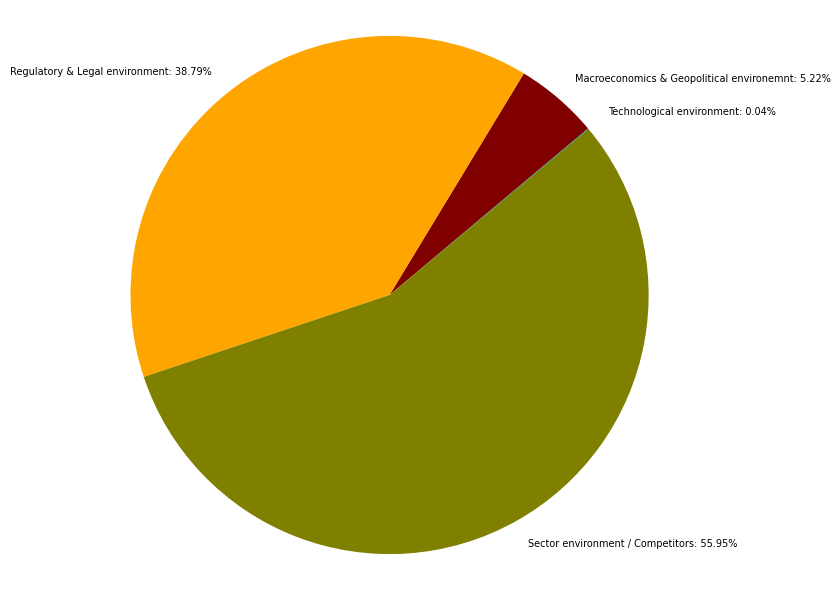

                                    Taxonomy  Average Impact  \
0  Macroeconomics & Geopolitical environemnt         571,151   
1             Regulatory & Legal environment       4,247,725   
2           Sector environment / Competitors       6,127,015   
3                  Technological environment           4,565   

   Pct of Total Impact  
0                    5  
1                   39  
2                   56  
3                    0  


In [25]:
plot_risk_taxonomy_level2_dropdown(df_be)

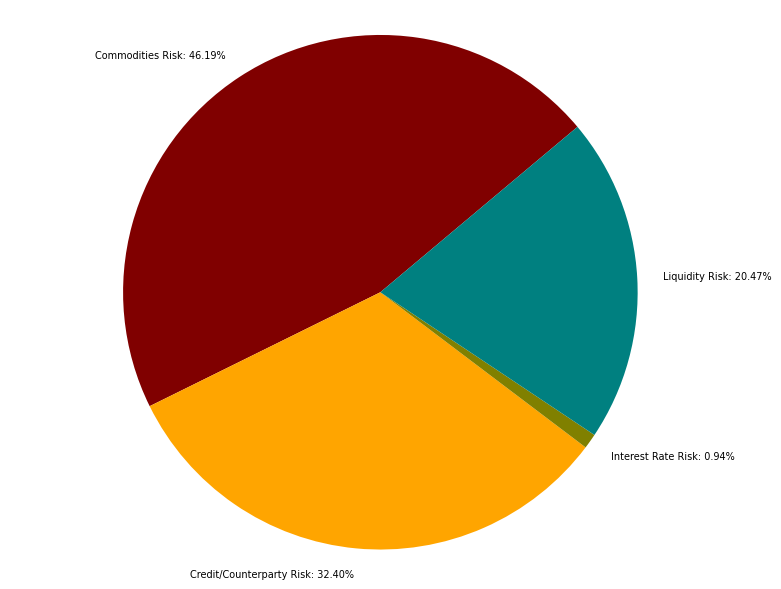

                   Taxonomy  Average Impact  Pct of Total Impact
0          Commodities Risk       2,649,578                   46
1  Credit/Counterparty Risk       1,858,328                   32
2        Interest Rate Risk          54,089                    1
3            Liquidity Risk       1,174,222                   20


In [26]:
plot_risk_taxonomy_level2_dropdown(df_financial)